In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


****
**Data Visualization**
****

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

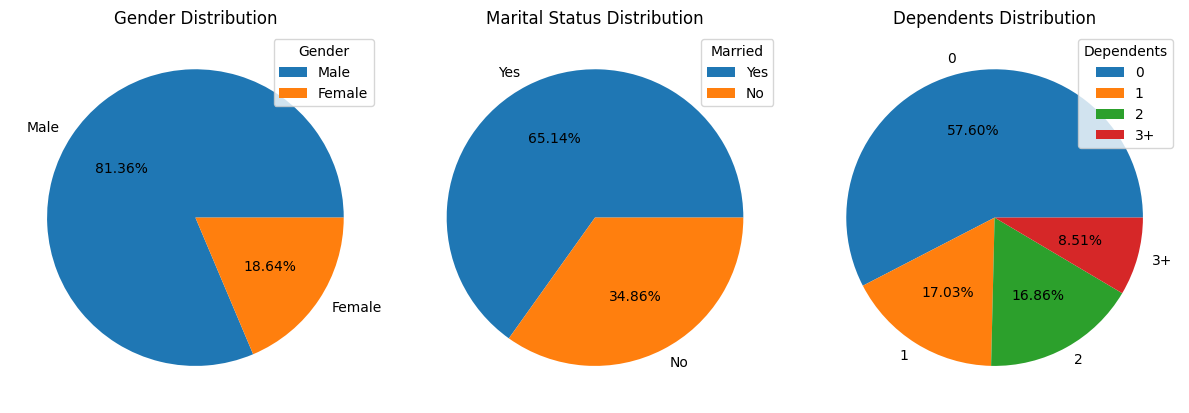

In [5]:
tdf=df['Gender'].value_counts().reset_index()
tdf.columns=['Gender','count']
tdf1=df['Married'].value_counts().reset_index()
tdf1.columns=['Married','count']
tdf2=df['Dependents'].value_counts().reset_index()
tdf2.columns=['Dependents','count']
tdf3=df['Education'].value_counts().reset_index()
tdf3.columns=['Education','count']
tdf4=df['Self_Employed'].value_counts().reset_index()
tdf4.columns=['Self_Employed','count']

fig,axes=plt.subplots(1,3,figsize=(12,12))
axes=axes.flatten()

axes[0].pie(tdf['count'], labels=tdf['Gender'], autopct='%.2f%%')
axes[0].set_title('Gender Distribution')
axes[0].legend(tdf['Gender'], title="Gender", loc="upper right")

axes[1].pie(tdf1['count'], labels=tdf1['Married'], autopct='%.2f%%')
axes[1].set_title('Marital Status Distribution')
axes[1].legend(tdf1['Married'], title="Married", loc="upper right")

axes[2].pie(tdf2['count'], labels=tdf2['Dependents'], autopct='%.2f%%')
axes[2].set_title('Dependents Distribution')
axes[2].legend(tdf2['Dependents'], title="Dependents", loc="upper right")

plt.tight_layout()
plt.show()


**Findings:**
**Gender Distribution:**

1. The dataset shows a skewed distribution towards males, with 81.36% of the individuals being male and only 18.64% being female.
2. This significant imbalance may have implications when analyzing gender-specific trends or outcomes within the data.

**Marital Status Distribution:**

1. A clear majority of the population, 65.14%, is married, while 34.86% are unmarried.
2. This could indicate that most individuals in this dataset belong to family structures or households where marriage is common, potentially influencing social and financial variables in the data.

**Dependents Distribution:**

1. A majority of individuals (57.60%) have no dependents. Smaller proportions of the population have 1 dependent (17.03%), 2 dependents (16.86%), and 3 or more dependents (8.51%).
2. This distribution suggests that most individuals either live alone or in households without dependents, which may be relevant when analyzing financial behaviors, loan amounts, or family-related metrics.

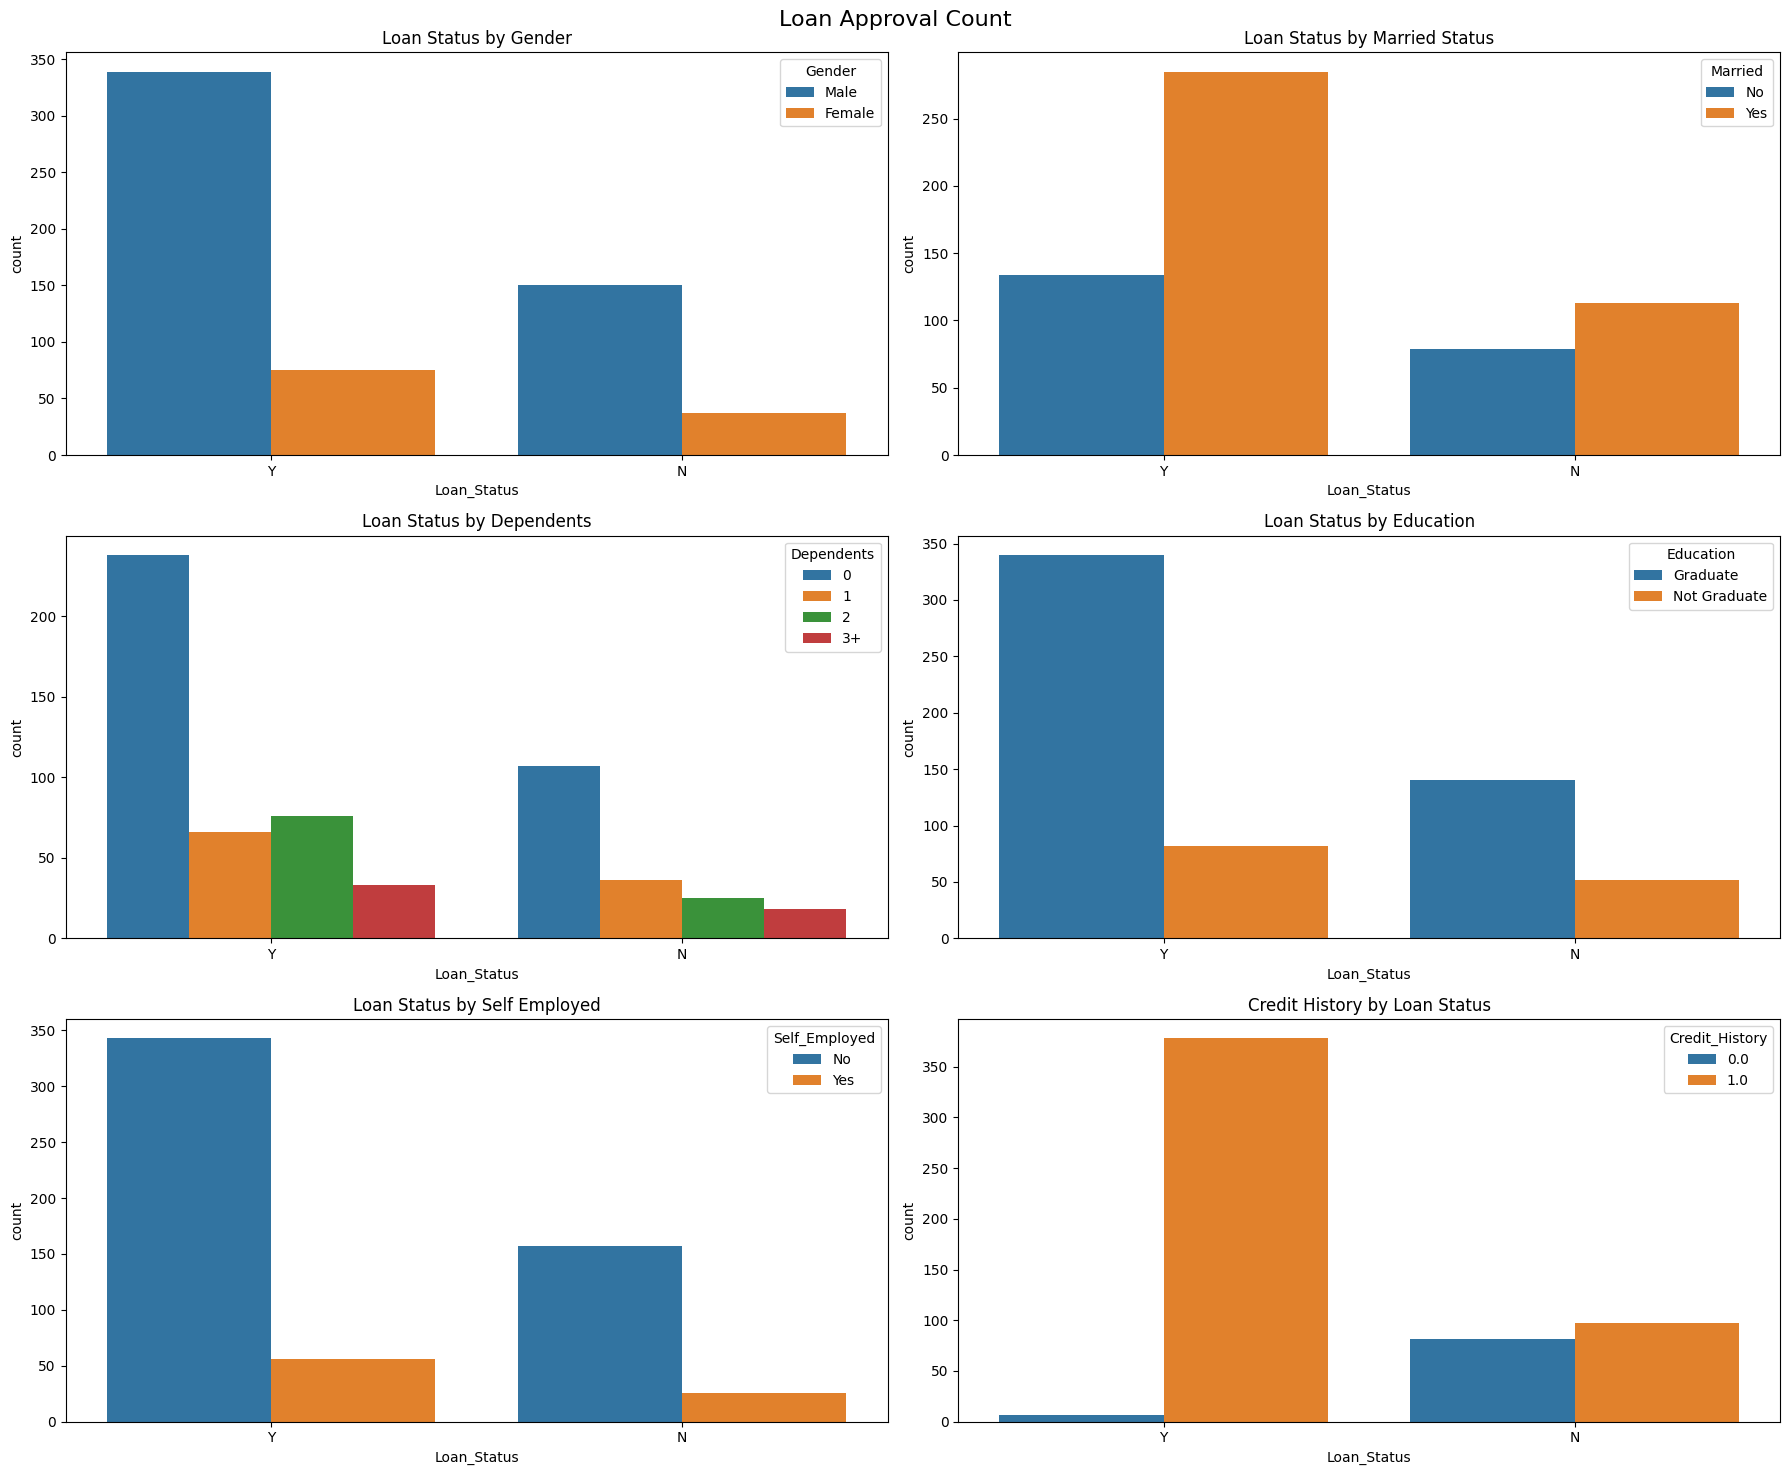

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()
sns.countplot(x='Loan_Status', hue='Gender', data=df, ax=axes[0])
axes[0].set_title('Loan Status by Gender')
sns.countplot(x='Loan_Status', hue='Married', data=df, ax=axes[1])
axes[1].set_title('Loan Status by Married Status')
sns.countplot(x='Loan_Status', hue='Dependents', data=df, ax=axes[2])
axes[2].set_title('Loan Status by Dependents')
sns.countplot(x='Loan_Status', hue='Education', data=df, ax=axes[3])
axes[3].set_title('Loan Status by Education')
sns.countplot(x='Loan_Status', hue='Self_Employed', data=df, ax=axes[4])
axes[4].set_title('Loan Status by Self Employed')
sns.countplot(hue='Credit_History', x='Loan_Status', data=df, ax=axes[5])
axes[5].set_title('Credit History by Loan Status')

for ax in axes[7:]:
    ax.axis('off')

fig.suptitle('Loan Approval Count', fontsize=16)
plt.tight_layout()
plt.show()

**Loan Status by Gender:**

1. Males have a significantly higher loan approval rate compared to females. The majority of approved loans are for males, with a large gap between the number of approved and unapproved loans for females.
2. This could suggest gender-based disparities in loan approval, though further investigation into other factors may be needed to clarify this observation.

**Loan Status by Marital Status:**

1. Married individuals have a higher approval rate compared to unmarried individuals. Most of the approved loans belong to married applicants, with relatively fewer approvals for unmarried individuals.
2. The data indicates that being married might be a favorable factor in loan approval decisions, possibly due to the assumption of financial stability in married households.

**Loan Status by Dependents:**

1. Individuals with no dependents have the highest number of loan approvals, followed by those with 1 and 2 dependents. However, those with 3 or more dependents have noticeably fewer approvals.
2. This suggests that having more dependents could be associated with a lower likelihood of loan approval, potentially due to the increased financial burden that comes with supporting dependents.

**Loan Status by Education:**

1. Graduates have a much higher loan approval rate compared to non-graduates. The number of approved loans for graduates is significantly larger, while non-graduates have both fewer approved and more rejected loan applications.
2. This indicates that education level, particularly being a graduate, plays a significant role in loan approval, potentially as a proxy for higher earning potential or financial literacy.

**Loan Status vs Self Employed:**

1. There is more probability of the Loan being accepted if you are not self Employed.
2. This indicates that for ones Loan request to be accepted they would need some amount of money or capital behind them for a Loan to be approved.

**Loan Status vs Credit History**

1. A credit score is a numerical representation of an individual's creditworthiness, used by lenders to assess the likelihood that a person will repay borrowed money. The score is typically based on credit history, including factors such as payment history, the total amount of debt, length of credit history, types of credit used, and recent credit inquiries.
2. Naturally approval of your loan is easier if your credit score is present.

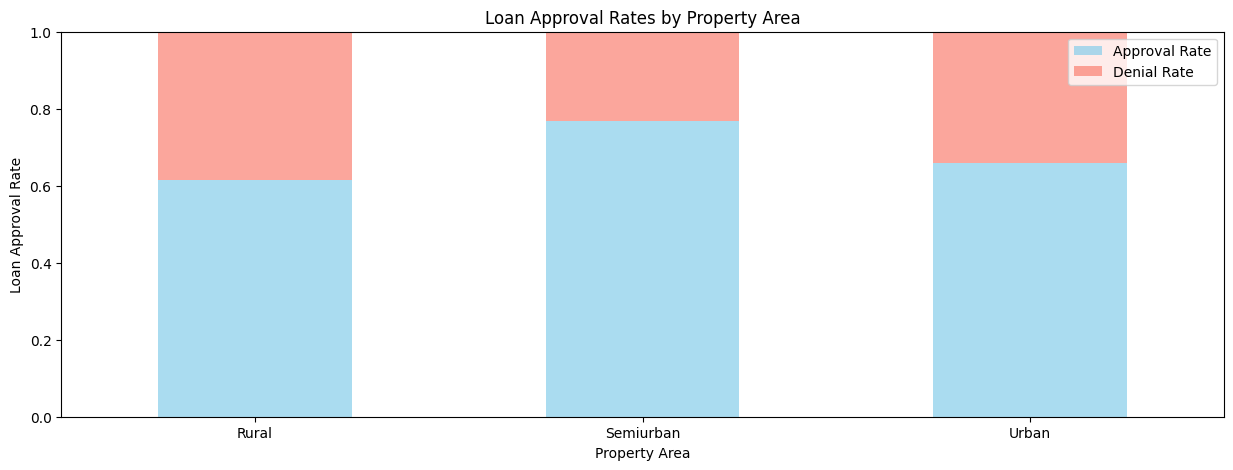

In [7]:
approval_rates = df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack().fillna(0)
approval_rates['Approval_Rate']=approval_rates['Y']
approval_rates['Denial_Rate']=approval_rates['N']

plt.figure(figsize=(15, 5))
approval_rates['Approval_Rate'].plot(kind='bar', color='skyblue', alpha=0.7, label='Approval Rate')
approval_rates['Denial_Rate'].plot(kind='bar', color='salmon', alpha=0.7, label='Denial Rate', bottom=approval_rates['Approval_Rate'])

plt.title('Loan Approval Rates by Property Area')
plt.xticks(rotation=0)
plt.xlabel('Property Area')
plt.ylabel('Loan Approval Rate')
plt.legend()
plt.ylim(0, 1)
plt.show()

**Rural Area:**

1. Loan approval rates in rural areas are slightly above 60%. This might suggest that despite potentially lower income levels and limited access to financial services, rural borrowers are more likely to secure loans. This could be due to government initiatives, such as agricultural or rural development schemes, which often encourage lending to rural populations to promote financial inclusion.
2. The remaining 40% denial rate could be attributed to factors like irregular income patterns in rural regions, a higher percentage of unorganized sector workers, or lack of adequate collateral.

**Semiurban Area:**

1. Semiurban areas exhibit similar approval rates to rural areas, also hovering just above 60%. Semiurban borrowers might have more access to banks and financial institutions compared to rural areas, potentially improving their chances for loan approval. Semiurban regions may benefit from a combination of agricultural and emerging urban economic activities, allowing for greater financial security among applicants.
2. Despite this, approximately 40% of loans are still denied, which could reflect the transitional nature of these areas where many people are engaged in small-scale or informal enterprises with less financial documentation.

**Urban Area:**

1. Surprisingly, loan approval rates in urban areas are slightly lower compared to rural and semiurban regions, standing at around 60%. While urban populations typically have greater access to financial services and higher income levels, the higher denial rate might be due to stricter loan evaluation processes in cities, where property prices and loan amounts are higher. Lenders in urban areas might also deal with a more diverse range of applications, leading to more stringent risk assessments.
2. The 40% denial rate could also be indicative of challenges such as higher living costs, unstable employment in the gig economy, or high personal debt levels, all of which can impact creditworthiness.

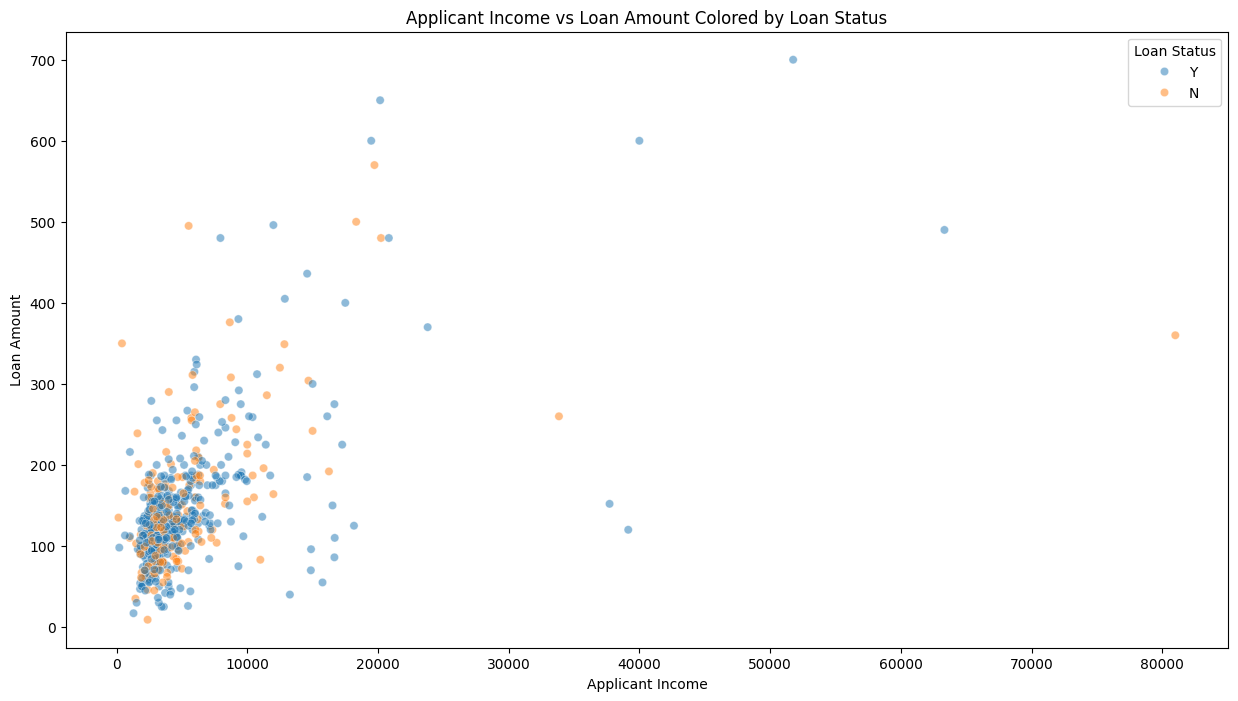

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',alpha=0.5)
plt.title('Applicant Income vs Loan Amount Colored by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

**Income and Loan Amount Relationship:**

The plot shows that applicants with higher incomes tend to request and receive higher loan amounts. This trend is visible as the points for higher incomes (on the x-axis) move up along the y-axis (representing loan amounts). However, the data also displays a large cluster at the lower end of both income and loan amount, indicating that many applicants fall within a lower income range and tend to request smaller loans.

**Loan Approval vs. Denial:**

The blue dots (approved loans) are more densely packed in the lower loan amounts, particularly where income is lower. This suggests that many low-income applicants have their loans approved, though the size of their loans is generally smaller.
The orange dots (denied loans) are interspersed with the blue dots, and there doesn’t seem to be a strong direct relationship between income and loan denial at lower income levels. However, as income and loan amounts increase, approvals seem to become more common.
For applicants with very high incomes (above 40,000), almost all loans are approved, as seen in the sparsely scattered blue dots at the higher end of both axes. Denials in this range are rare.

**Loan Denials at Higher Loan Amounts:**

There are a few cases where applicants with moderate incomes (in the 10,000–20,000 range) are denied loans, even for relatively high loan amounts. This may suggest stricter evaluations when a larger loan is requested, regardless of income.

**Conclusion:**

This plot demonstrates a clear relationship between applicant income and loan amount, with higher incomes generally corresponding to higher loan requests and higher approval rates. The data also suggests that income alone does not guarantee loan approval, particularly at higher loan amounts where additional factors such as credit history or risk evaluations may come into play. Nevertheless, applicants with very high incomes almost always get loan approvals, while those with lower incomes are more likely to see mixed outcomes, especially when applying for larger loans.



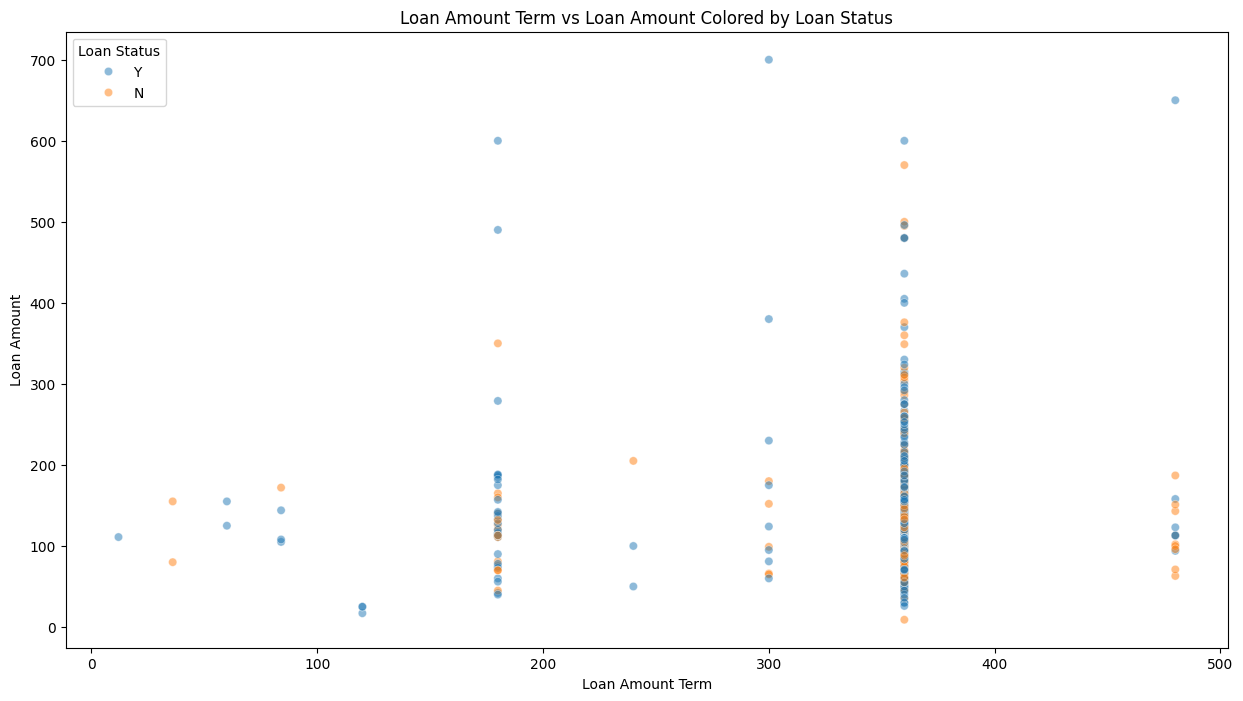

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Loan_Amount_Term',y='LoanAmount',hue='Loan_Status',alpha=0.5)
plt.title('Loan Amount Term vs Loan Amount Colored by Loan Status')
plt.xlabel('Loan Amount Term')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

**Conclusions**

1. This scatter plot illustrates that longer loan terms, particularly around 360 months, are associated with higher loan amounts and increased approval rates. Shorter-term loans (100 months or less), especially for higher amounts, are more likely to be denied, possibly due to the strain of larger monthly repayments on the borrower's financial situation. 
2. The mixed distribution of approvals and denials across various terms suggests that loan term length and loan amount are key factors in the loan approval decision process, but other factors, such as the borrower’s creditworthiness or risk profile, also play a significant role.

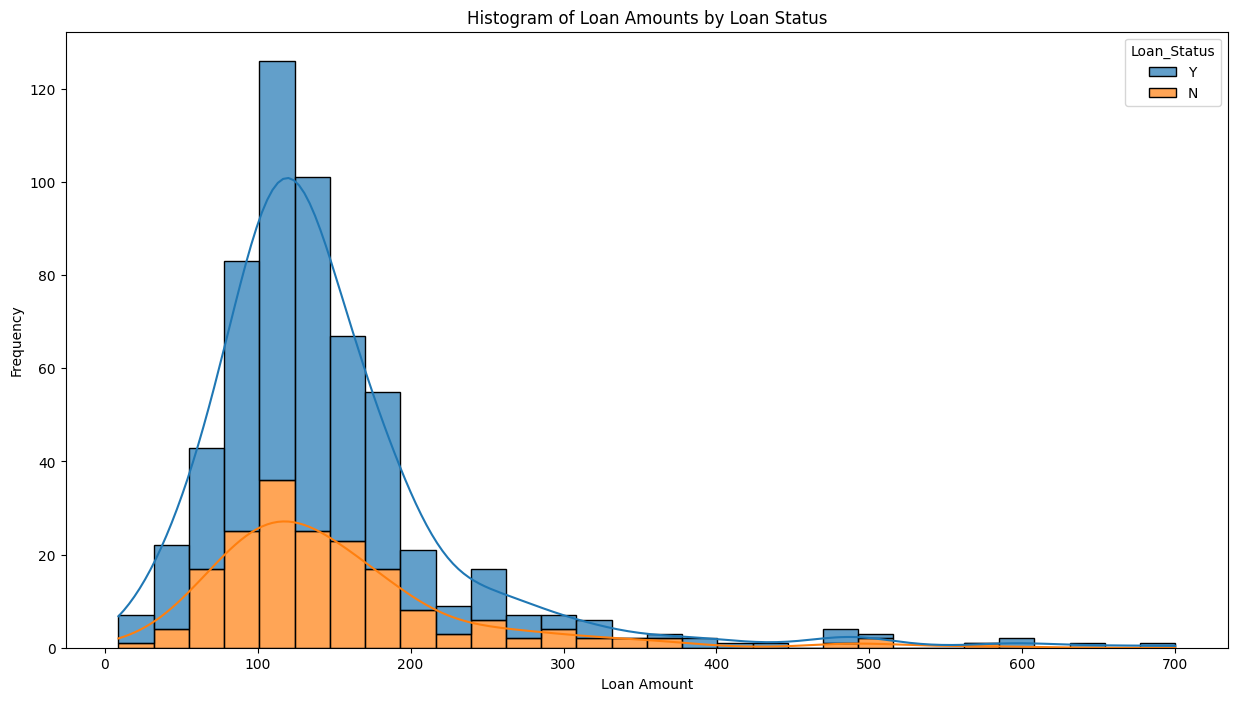

In [10]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='LoanAmount', hue='Loan_Status', multiple='stack', bins=30, alpha=0.7,label='Loan_Status',kde=True)
plt.title('Histogram of Loan Amounts by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

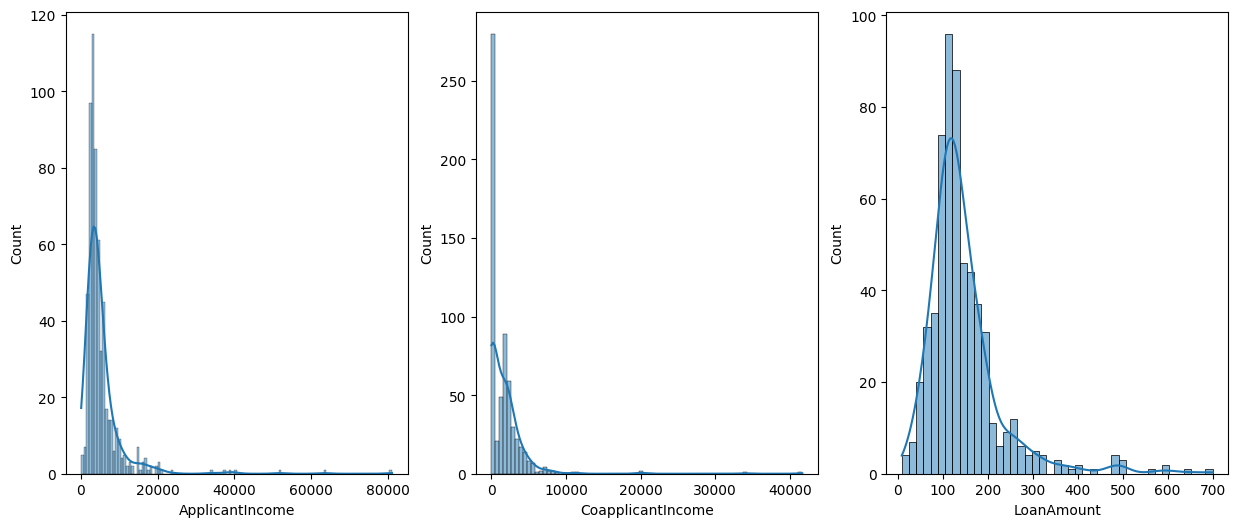

In [11]:
fig,axes=plt.subplots(1,3,figsize=(15,6))
sns.histplot(data=df,x='ApplicantIncome',kde=True,ax=axes[0])
sns.histplot(data=df,x='CoapplicantIncome',kde=True,ax=axes[1])
sns.histplot(data=df,x='LoanAmount',kde=True,ax=axes[2])
plt.show()

****
**Data Preprocessing and Analysis**
****

Visualizing Null values

<Axes: >

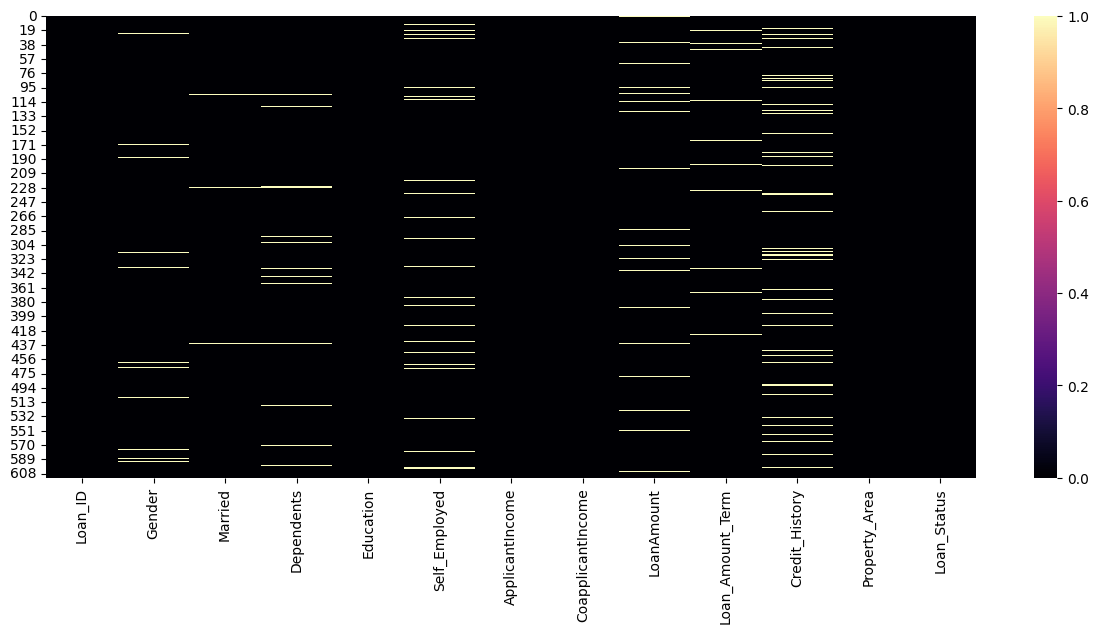

In [12]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),cmap='magma')

Filling Null values

In [13]:
print(df['Gender'].isnull().sum())
print(df['Gender'].unique())
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender']=df['Gender'].astype(int)

13
['Male' 'Female' nan]


In [14]:
print(df['Married'].isnull().sum())
print(df['Married'].unique())
df['Married']=df['Married'].apply(lambda x: 1 if x=='Yes' else 0)
df['Married']=df['Married'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].astype(int)

3
['No' 'Yes' nan]


In [15]:
print(df['Dependents'].isnull().sum())
print(df['Dependents'].value_counts())

15
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


In [16]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Dependents']=df['Dependents'].replace('3+','3')
df['Dependents']=df['Dependents'].astype(int)

In [17]:
print(df['LoanAmount'].isnull().sum())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

22


In [18]:
print(df['Loan_Amount_Term'].isnull().sum())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

14


In [19]:
print(df['Credit_History'].isnull().sum())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

50


Filling NUll values and Encoding Categorical variables

In [20]:
print(df['Self_Employed'].isnull().sum())
print(df['Self_Employed'].unique())
df['Self_Employed']=df['Self_Employed'].apply(lambda x: 0 if x=='No' else 1)
df['Self_Employed']=df['Self_Employed'].astype(int)

32
['No' 'Yes' nan]


In [21]:
print(df['Loan_Status'].unique())
df['Loan_Status']=df['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)
df['Loan_Status']=df['Loan_Status'].astype(int)

['Y' 'N']


In [22]:
print(df['Education'].value_counts())
print(df['Education'].unique())
df['Education']=df['Education'].apply(lambda x: 1 if x=='Graduate' else 0)
df['Education']=df['Education'].astype(int)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
['Graduate' 'Not Graduate']


In [23]:
df['Property_Area'].unique()
tdf=pd.get_dummies(df['Property_Area'])
df=pd.concat([df,tdf],axis=1)
df=df.drop(columns='Property_Area')

In [24]:
df[['Rural','Semiurban','Urban']]=df[['Rural','Semiurban','Urban']].astype(int)

In [25]:
df.drop(columns='Loan_ID',axis=1,inplace=True)

Checking for Null values

In [26]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Loan_Status          False
Rural                False
Semiurban            False
Urban                False
dtype: bool

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int32  
 11  Rural              614 non-null    int32  
 12  Semiurban          614 non-null    int32  
 13  Urban              614 non-null    int32  
dtypes: float64(4), int32(9), int64(1)
memory usage: 50.4 KB


In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [29]:
df.columns
df=df[['Gender', 'Married', 'Dependents','Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural',
       'Semiurban', 'Urban' ,'Loan_Status']]

Dropping Duplicates (If any)

In [30]:
df=df.drop_duplicates(inplace=False)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,0,1,1


Checking Correlation between features and Target Variable using Mutual Information

In [31]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural', 'Semiurban', 'Urban',
       'Loan_Status'],
      dtype='object')

Removing Outliers

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

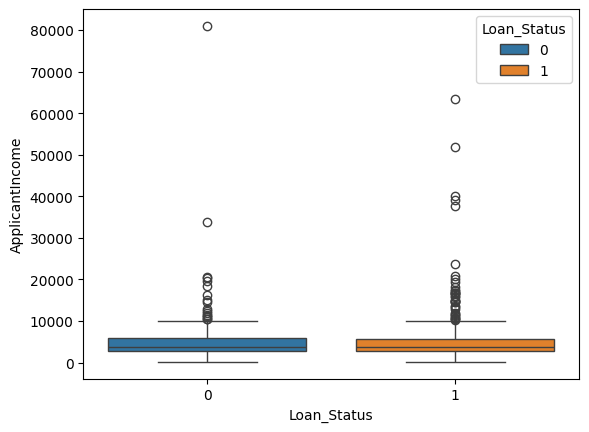

In [32]:
sns.boxplot(x='Loan_Status',data=df,y='ApplicantIncome',hue='Loan_Status')

In [33]:
q1=df['ApplicantIncome'].quantile(0.25)
q3=df['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['ApplicantIncome']>=lb)&(df['ApplicantIncome']<=ub)]

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

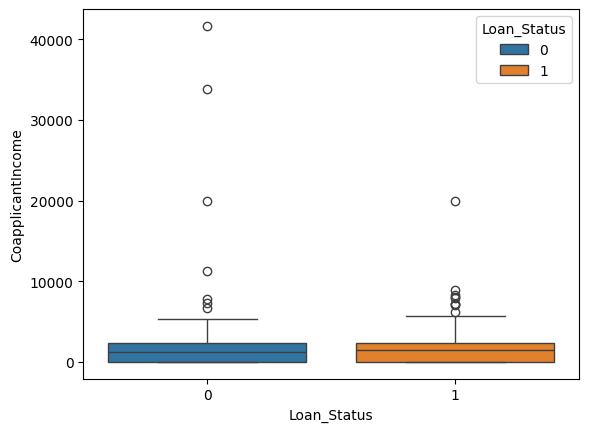

In [34]:
sns.boxplot(x='Loan_Status',data=df,y='CoapplicantIncome',hue='Loan_Status')

In [35]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['CoapplicantIncome']>=lb)&(df['CoapplicantIncome']<=ub)]

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

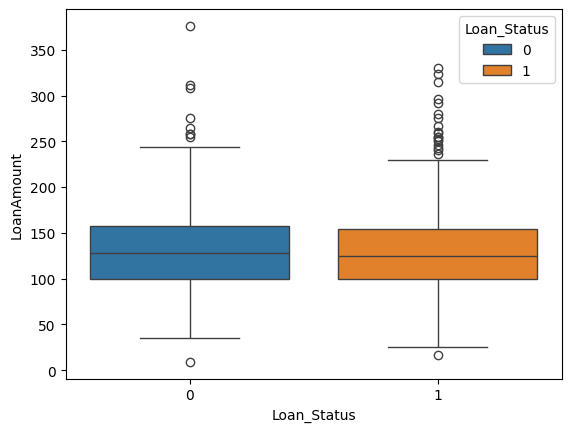

In [36]:
sns.boxplot(x='Loan_Status',data=df,y='LoanAmount',hue='Loan_Status')

In [37]:
q1=df['LoanAmount'].quantile(0.25)
q3=df['LoanAmount'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['LoanAmount']>=lb)&(df['LoanAmount']<=ub)]

In [38]:
from scipy.stats import spearmanr
df.copy()
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']
for feature in x.columns:
    correlation, p_value = spearmanr(x[feature], y)
    print(f"Feature: {feature}, Spearman Correlation: {correlation}, p-value: {p_value}")

Feature: Gender, Spearman Correlation: 0.06711125106152109, p-value: 0.12641011969753882
Feature: Married, Spearman Correlation: 0.0712806640287466, p-value: 0.10446049617964888
Feature: Dependents, Spearman Correlation: -0.009179831241291778, p-value: 0.8345786091393697
Feature: Education, Spearman Correlation: 0.11747162067528237, p-value: 0.007326906156380624
Feature: Self_Employed, Spearman Correlation: 0.0048688011312119995, p-value: 0.9118072840656001
Feature: ApplicantIncome, Spearman Correlation: 0.0030501581400842986, p-value: 0.9446815085105291
Feature: CoapplicantIncome, Spearman Correlation: 0.0729246465916201, p-value: 0.09668368351195317
Feature: LoanAmount, Spearman Correlation: -0.00994629104804804, p-value: 0.8209913455179813
Feature: Loan_Amount_Term, Spearman Correlation: -0.02339972321460794, p-value: 0.594459660278479
Feature: Credit_History, Spearman Correlation: 0.5721948263677845, p-value: 1.4900225453396406e-46
Feature: Rural, Spearman Correlation: -0.109028603

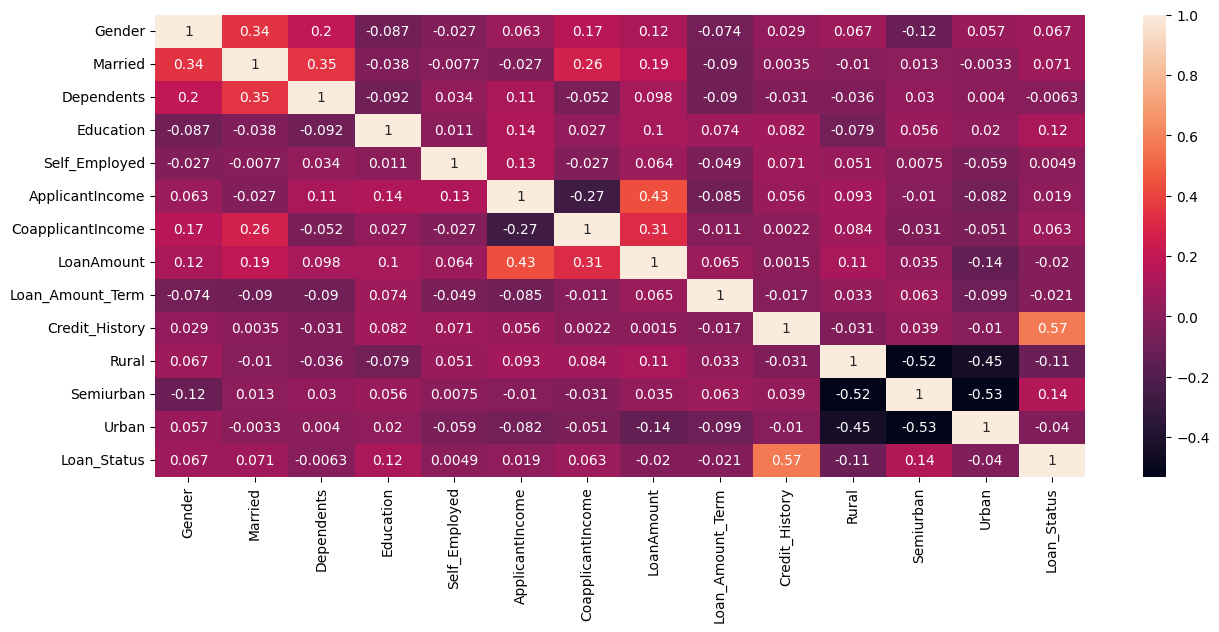

In [39]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

****
**Data Preparation**
****

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']
x= MinMaxScaler().fit_transform(x)
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

l_xtr=x_tr.copy()
l_xte=x_te.copy()
l_ytr=y_tr.copy()
l_yte=y_te.copy()

k_xtr=x_tr.copy()
k_xte=x_te.copy()
k_ytr=y_tr.copy()
k_yte=y_te.copy()

d_xtr=x_tr.copy()
d_xte=x_te.copy()
d_ytr=y_tr.copy()
d_yte=y_te.copy()

rf_xtr=x_tr.copy()
rf_xte=x_te.copy()
rf_ytr=y_tr.copy()
rf_yte=y_te.copy()

a_xtr=x_tr.copy()
a_xte=x_te.copy()
a_ytr=y_tr.copy()
a_yte=y_te.copy()

****
**Models**
****

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report

**Logistic Regression**

In [42]:
l=[i for i in range(1,1000,50)]
para={'penalty':['l1','l2'],'C':list(l),'max_iter':list(np.arange(10,500,5)),'solver': ['liblinear', 'saga']}
lreg=LogisticRegression(max_iter=1000)
nlreg=RandomizedSearchCV(lreg,scoring='accuracy',cv=10,param_distributions=para,n_jobs=-1,random_state=20)
nlreg.fit(l_xtr,l_ytr)
print(nlreg.best_params_)
print(nlreg.best_score_)
nlreg=nlreg.best_estimator_
pred_t=nlreg.predict(l_xtr)
pred=nlreg.predict(l_xte)

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': 951}
0.8282051282051283


**K Nearest Neighbors**

In [43]:
k=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,51))}
nk=RandomizedSearchCV(k,param_distributions=param,cv=10,random_state=20,n_jobs=-1,scoring='accuracy')
nk.fit(d_xtr,d_ytr)
print(nk.best_params_)
print(nk.best_score_)
nk=nk.best_estimator_
pred1_t=nk.predict(d_xtr)
pred1=nk.predict(d_xte)

{'n_neighbors': 9}
0.7820512820512822


**Decision Tree Classifier**

In [44]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(d_xtr,d_ytr)
alphas=path.ccp_alphas
param={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=param,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(d_xtr,d_ytr)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.005912158971558649}
0.7923076923076924


In [45]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
param={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,301)),'min_samples_leaf':list(np.arange(1,301)),
       'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=param,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(d_xtr,d_ytr)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_
pred2_t=ndt.predict(d_xtr)
pred2=ndt.predict(d_xte)

{'min_samples_split': 139, 'min_samples_leaf': 31, 'max_features': None, 'criterion': 'entropy'}
0.8333333333333334


**Random Forest Classifier**

In [46]:
rf=RandomForestClassifier()
param={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(1,51)),
       'max_features':['sqrt','log2',None],'n_estimators':[300]}
nrf=RandomizedSearchCV(rf,param_distributions=param,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(rf_xtr,rf_ytr)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_
pred3_t=nrf.predict(rf_xtr)
pred3=nrf.predict(rf_xte)

{'n_estimators': 300, 'min_samples_split': 46, 'min_samples_leaf': 23, 'max_features': None, 'criterion': 'gini'}
0.8333333333333334


**AdaBoost Classifier**

In [47]:
ada=AdaBoostClassifier(estimator=DecisionTreeClassifier(),algorithm='SAMME')
param_dist = {
    'n_estimators': [1000],  
    'learning_rate': list(np.arange(0.1,2.01,0.01)),  
    'estimator__max_depth': list(np.arange(1, 5)), 
}
random_search = RandomizedSearchCV(estimator=ada,
                                   param_distributions=param_dist,
                                   n_iter=10,            
                                   cv=5,                 
                                   random_state=42,   
                                   scoring='accuracy',   
                                   n_jobs=-1)    
random_search.fit(a_xtr, a_ytr)
print(random_search.best_params_)
print(random_search.best_score_)
random_search=random_search.best_estimator_
pred4_t=random_search.predict(a_xtr)
pred4=random_search.predict(a_xte)

{'n_estimators': 1000, 'learning_rate': 0.7699999999999997, 'estimator__max_depth': 1}
0.8256410256410256


In [48]:
tdf=pd.DataFrame({'Classification Algorithms':['Logistic Regression','K Nearest Neighbors','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Training Accuracy':[accuracy_score(l_ytr,pred_t),accuracy_score(k_ytr,pred1_t),accuracy_score(d_ytr,pred2_t),accuracy_score(rf_ytr,pred3_t),accuracy_score(a_ytr,pred4_t)],
                  'Training Precision':[precision_score(l_ytr,pred_t),precision_score(k_ytr,pred1_t),precision_score(d_ytr,pred2_t),precision_score(rf_ytr,pred3_t),precision_score(a_ytr,pred4_t)],
                  'Training Recall':[recall_score(l_ytr,pred_t),recall_score(k_ytr,pred1_t),recall_score(d_ytr,pred2_t),recall_score(rf_ytr,pred3_t),recall_score(a_ytr,pred4_t)],
                  'Training F1 Score':[f1_score(l_ytr,pred_t),f1_score(k_ytr,pred1_t),f1_score(d_ytr,pred2_t),f1_score(rf_ytr,pred3_t),f1_score(a_ytr,pred4_t)]})
tdf=tdf.sort_values(by='Training Accuracy').reset_index(drop=True)
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,K Nearest Neighbors,0.807692,0.791908,0.989170,0.879615
1,Decision Tree Classifier,0.833333,0.817365,0.985560,0.893617
2,Random Forest Classifier,0.833333,0.817365,0.985560,0.893617
3,Logistic Regression,0.835897,0.819820,0.985560,0.895082
4,AdaBoost Classifier,0.858974,0.851266,0.971119,0.907251


**General Inference for Training Metrics:**

1. AdaBoost shows the best overall performance, particularly with its high F1 score and precision, making it a robust classifier in terms of both minimizing false positives and balancing precision with recall.
2. Logistic Regression and Random Forest provide similar performance with slightly lower precision and F1 scores compared to AdaBoost.
3. K Nearest Neighbors excels in recall but compromises on precision, meaning it identifies nearly all positive cases but at the cost of more false positives.
4. Decision Tree is closely behind Logistic Regression and Random Forest in most metrics but performs better than KNN in precision.


**Thus, AdaBoost appears to be the most balanced and effective model overall, particularly for scenarios where precision is more critical than just capturing all positives.**

In [49]:
tedf=pd.DataFrame({'Classification Algorithms':['Logistic Regression','K Nearest Neighbors','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Testing Accuracy':[accuracy_score(l_yte,pred),accuracy_score(k_yte,pred1),accuracy_score(d_yte,pred2),accuracy_score(rf_yte,pred3),accuracy_score(a_yte,pred4)],
                  'Testing Precision':[precision_score(l_yte,pred),precision_score(k_yte,pred1),precision_score(d_yte,pred2),precision_score(rf_yte,pred3),precision_score(a_yte,pred4)],
                  'Testing Recall':[recall_score(l_yte,pred),recall_score(k_yte,pred1),recall_score(d_yte,pred2),recall_score(rf_yte,pred3),recall_score(a_yte,pred4)],
                  'Testing F1 Score':[f1_score(l_yte,pred),f1_score(k_yte,pred1),f1_score(d_yte,pred2),f1_score(rf_yte,pred3),f1_score(a_yte,pred4)]})
tedf=tedf.sort_values(by='Testing Accuracy').reset_index(drop=True)
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,K Nearest Neighbors,0.715385,0.700000,0.988235,0.819512
1,AdaBoost Classifier,0.769231,0.777778,0.905882,0.836957
2,Logistic Regression,0.800000,0.770642,0.988235,0.865979
3,Decision Tree Classifier,0.800000,0.770642,0.988235,0.865979
4,Random Forest Classifier,0.800000,0.770642,0.988235,0.865979


**General Inference for Testing metrics:**

1. Logistic Regression and Random Forest Classifier are the most effective models on the testing set, providing both high accuracy and a good balance between precision and recall. This suggests they generalize well from training to testing data.
2. Decision Tree Classifier also performs well, but slightly less robust than Logistic Regression and Random Forest.
3. AdaBoost, while having the best precision, trades off with lower recall, indicating it is better at minimizing false positives but misses more positive cases compared to the top-performing models.
4. K Nearest Neighbors performs the weakest on the testing set, especially due to its low precision, even though it captures nearly all positive cases with its high recall.

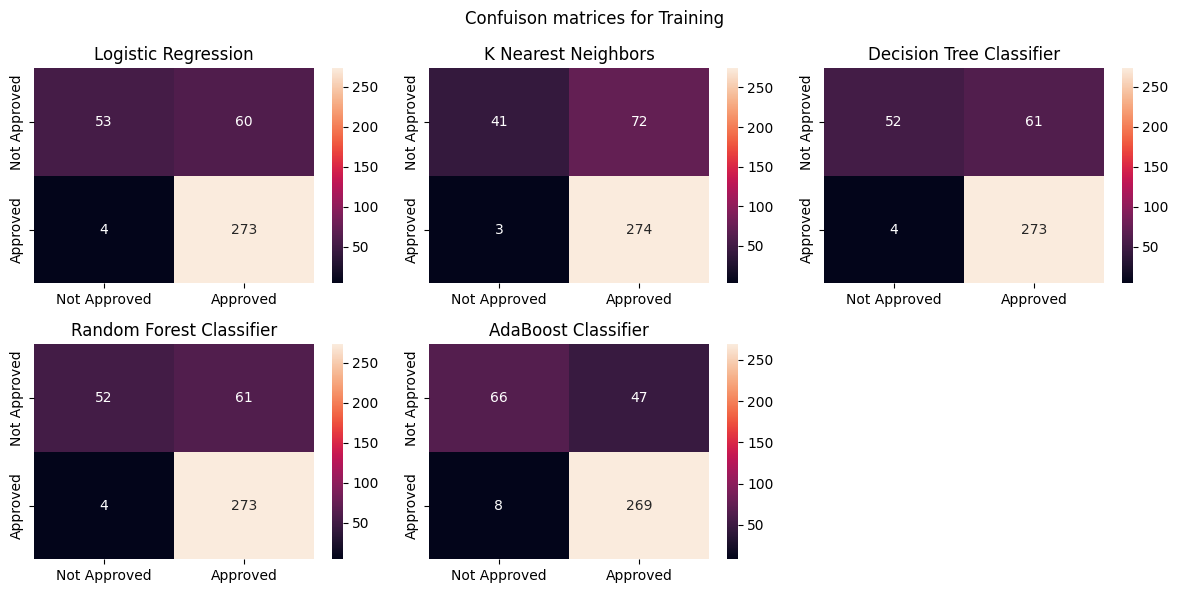

In [50]:
fig,axes=plt.subplots(2,3,figsize=(12,6))
labels = ['Not Approved', 'Approved']
sns.heatmap(confusion_matrix(l_ytr,pred_t),annot=True,ax=axes[0][0],fmt='g')
axes[0][0].set_title('Logistic Regression')
axes[0][0].set_xticklabels(labels)
axes[0][0].set_yticklabels(labels)
sns.heatmap(confusion_matrix(k_ytr,pred1_t),annot=True,ax=axes[0][1],fmt='g')
axes[0][1].set_title('K Nearest Neighbors')
axes[0][1].set_xticklabels(labels)
axes[0][1].set_yticklabels(labels)
sns.heatmap(confusion_matrix(d_ytr,pred2_t),annot=True,ax=axes[0][2],fmt='g')
axes[0][2].set_title('Decision Tree Classifier')
axes[0][2].set_xticklabels(labels)
axes[0][2].set_yticklabels(labels)
sns.heatmap(confusion_matrix(rf_ytr,pred3_t),annot=True,ax=axes[1][0],fmt='g')
axes[1][0].set_title('Random Forest Classifier')
axes[1][0].set_xticklabels(labels)
axes[1][0].set_yticklabels(labels)
sns.heatmap(confusion_matrix(a_ytr,pred4_t),annot=True,ax=axes[1][1],fmt='g')
axes[1][1].set_title('AdaBoost Classifier')
axes[1][1].set_xticklabels(labels)
axes[1][1].set_yticklabels(labels)
axes[1][2].axis('off')
plt.suptitle("Confuison matrices for Training")
plt.tight_layout()
plt.show()

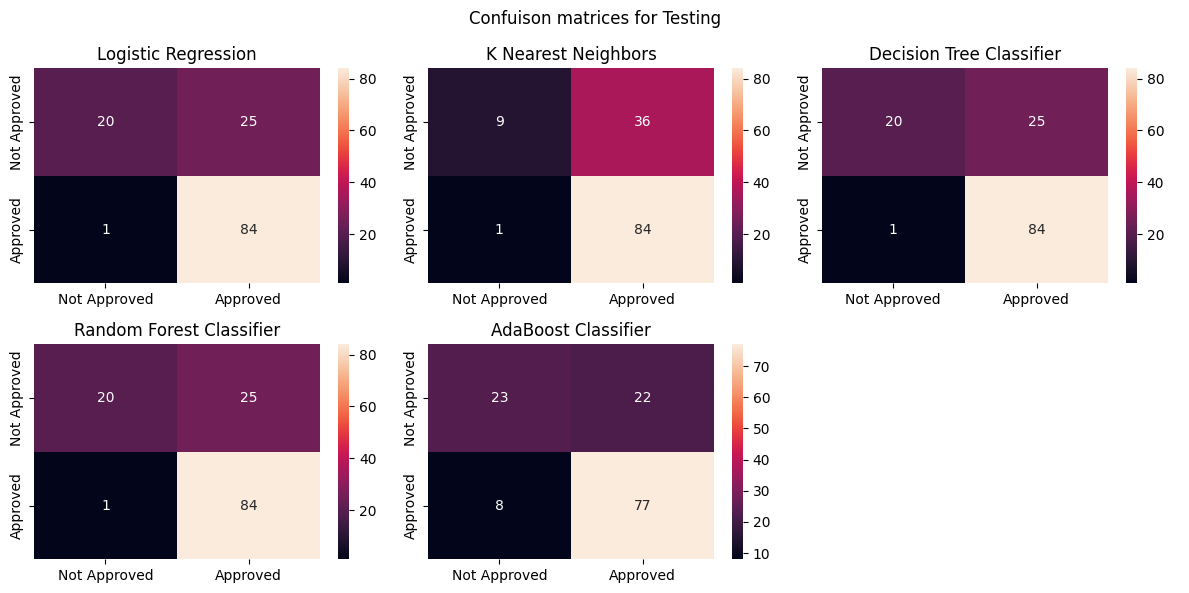

In [51]:
fig,axes=plt.subplots(2,3,figsize=(12,6))
labels = ['Not Approved', 'Approved']
sns.heatmap(confusion_matrix(l_yte,pred),annot=True,ax=axes[0][0])
axes[0][0].set_title('Logistic Regression')
axes[0][0].set_xticklabels(labels)
axes[0][0].set_yticklabels(labels)
sns.heatmap(confusion_matrix(k_yte,pred1),annot=True,ax=axes[0][1])
axes[0][1].set_title('K Nearest Neighbors')
axes[0][1].set_xticklabels(labels)
axes[0][1].set_yticklabels(labels)
sns.heatmap(confusion_matrix(d_yte,pred2),annot=True,ax=axes[0][2])
axes[0][2].set_title('Decision Tree Classifier')
axes[0][2].set_xticklabels(labels)
axes[0][2].set_yticklabels(labels)
sns.heatmap(confusion_matrix(rf_yte,pred3),annot=True,ax=axes[1][0])
axes[1][0].set_title('Random Forest Classifier')
axes[1][0].set_xticklabels(labels)
axes[1][0].set_yticklabels(labels)
sns.heatmap(confusion_matrix(a_yte,pred4),annot=True,ax=axes[1][1])
axes[1][1].set_title('AdaBoost Classifier')
axes[1][1].set_xticklabels(labels)
axes[1][1].set_yticklabels(labels)
axes[1][2].axis('off')
plt.suptitle("Confuison matrices for Testing")
plt.tight_layout()
plt.show()

**CONCLUSION:**

**If you're prioritizing generalization and reliable performance on new data, Logistic Regression and Random Forest Classifier are the best models, closely followed by Decision Tree Classifier. AdaBoost is a strong model but slightly more prone to overfitting. KNN should likely be avoided due to its significant overfitting.**